Homework: Regression to estimate house price.
Predict the price from:
 - house age 
 - distance to the station
 - number of convenience stores

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
# load the dataset
df=pd.read_csv('house_prices1.csv')
target_name="house age"
target=df[target_name]

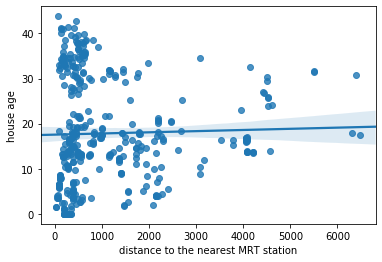

In [141]:

sns.regplot(x='distance to the nearest MRT station',y=target_name,data=df)
plt.show()


In [142]:
normalized_df=(df-df.min())/(df.max()-df.min())

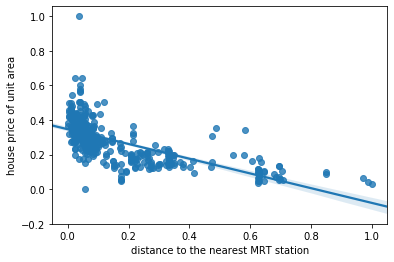

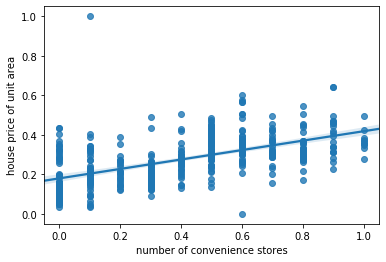

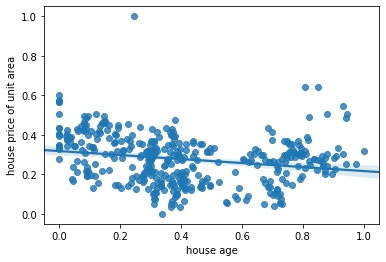

In [143]:
def min_max_norm(df):
    return (df-df.min())/(df.max()-df.min())
df = min_max_norm(df)
#ha_min = df['house age'].min()
#ha_max = df['house age'].max()
sns.regplot(x='distance to the nearest MRT station',y='house price of unit area',data=df)
plt.show()
sns.regplot(x='number of convenience stores',y='house price of unit area',data=df)
plt.show()
sns.regplot(x='house age',y='house price of unit area',data=df)
plt.show()



In [ ]:
x = np.linspace(-5,5,100)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

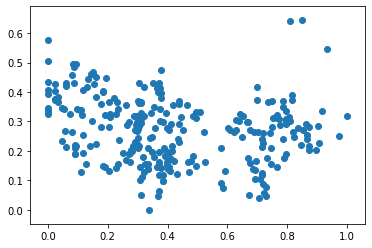

In [144]:
data_x = df['house age'].values.reshape(-1,1)
data_y = df['house price of unit area'].values.reshape(-1,1)
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.30, shuffle = False)

plot = linear_model.LinearRegression()
plot.fit(train_x, train_y)
plt.scatter(train_x,train_y)
plt.show()

In [157]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m)*(np.sum(np.square(predictions-y)))
    return cost

In [158]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [179]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        print(theta)
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [180]:
lr =0.01
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(data_x),1)),data_x]
theta,cost_history,theta_history = gradient_descent(X_b,data_y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))



Theta0:          -0.192,
Theta1:          -0.104
Final cost/MSE:  22057.595


In [181]:
lr =0.5
n_iter = 50

theta = -1

X_b = np.c_[np.ones((len(data_x),1)),data_x]
theta,cost_history = stocashtic_gradient_descent(X_b,data_y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

-1
[[-0.36807475 -0.36857032]
 [-0.730257   -0.73037612]]
[[-0.01707396 -0.01736375]
 [-0.56719082 -0.56722287]]
[[ 0.17855022  0.17837524]
 [-0.47580886 -0.47579425]]
[[ 0.28748453  0.28737367]
 [-0.4188478  -0.41880801]]
[[ 0.34464293  0.34456837]
 [-0.38665788 -0.38660547]]
[[ 0.37419337  0.3741393 ]
 [-0.36652018 -0.36646135]]
[[ 0.39268594  0.39264349]
 [-0.35063252 -0.35057105]]
[[ 0.40131957  0.40128386]
 [-0.33922774 -0.33916566]]
[[ 0.4053835   0.40535158]
 [-0.32882967 -0.32876819]]
[[ 0.40631872  0.40628963]
 [-0.32075074 -0.32069026]]
[[ 0.40590139  0.40587405]
 [-0.31347771 -0.31341851]]
[[ 0.40909413  0.40906773]
 [-0.30438297 -0.30432537]]
[[ 0.40200668  0.40198164]
 [-0.29984372 -0.29978738]]
[[ 0.39856596  0.39854167]
 [-0.29571248 -0.29565761]]
[[ 0.39571898  0.39569537]
 [-0.29059536 -0.29054198]]
[[ 0.39155564  0.3915331 ]
 [-0.28655803 -0.28650593]]
[[ 0.39062943  0.39060763]
 [-0.28075985 -0.28070924]]
[[ 0.38990363  0.38988219]
 [-0.27482558 -0.27477658]]
[[ 0.39

In [151]:
print("f(x)= " +str(plot.intercept_) + " + " + str(plot.coef_) + "*x")

plot.intercept_[0] + (plot.coef_[0][0])

f(x)= [0.30954492] + [[-0.09094549]]*x


0.2185994338164881

In [146]:
y_pred = plot.predict(test_x)
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0    0.295723   0.273831
1    0.434031   0.247046
2    0.439490   0.285459
3    0.458599   0.296671
4    0.453139   0.288989
..        ...        ...
115  0.303913   0.224621
116  0.101911   0.243724
117  0.361237   0.292934
118  0.354868   0.284836
119  0.425842   0.302485

[120 rows x 2 columns]

In [147]:
predicted_y = plot.predict(test_x)
mse = np.mean((predicted_y - test_y) ** 2)
print ("Mean squared error: %.5f" % mse)

Mean squared error: 0.02149


In [148]:
np.interp(0.3, 'house age','house price of unit area')

ValueError: object of too small depth for desired array

In [69]:
thetaz = -1.0
thetao = -0.5
def sum_sq_err():
    sum = 0
    for index, row in test.iterrows():
     # access data using column names
    sum = sum + (row['house price of unit area'] - np)
    print(index, row['house age'], row['house price of unit area'])
sum_sq_err()
        
#for j in range(1,50):

300 0.8789954337899544 0.24203821656050956
301 0.23744292237442924 0.17925386715195635
302 0.3812785388127854 0.08280254777070063
303 0.34246575342465757 0.12101910828025476
304 0.7442922374429225 0.3002729754322111
305 0.3926940639269407 0.359417652411283
306 0.08219178082191782 0.46587807097361233
307 0.4109589041095891 0.06733393994540492
308 0.3972602739726027 0.032757051865332114
309 0.7648401826484019 0.35486806187443126
310 0.3767123287671233 0.04731574158325751
311 0.317351598173516 0.3357597816196542
312 0.3858447488584475 0.27388535031847133
313 0.48630136986301375 0.3148316651501365
314 0.4337899543378996 0.1337579617834395
315 0.0 0.4340309372156505
316 0.7899543378995435 0.3057324840764331
317 0.6940639269406392 0.2602365787079163
318 0.1050228310502283 0.4194722474977252
319 0.25114155251141557 0.12465878070973613
320 0.2990867579908676 0.3484986351228389
321 0.4155251141552512 0.3230209281164695
322 0.07077625570776257 0.4422202001819836
323 0.4954337899543379 0.14103730

In [ ]:
o1 = -1
o2 = -0.5
def function(o1, o2)
    return o1 + o2*x
